   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


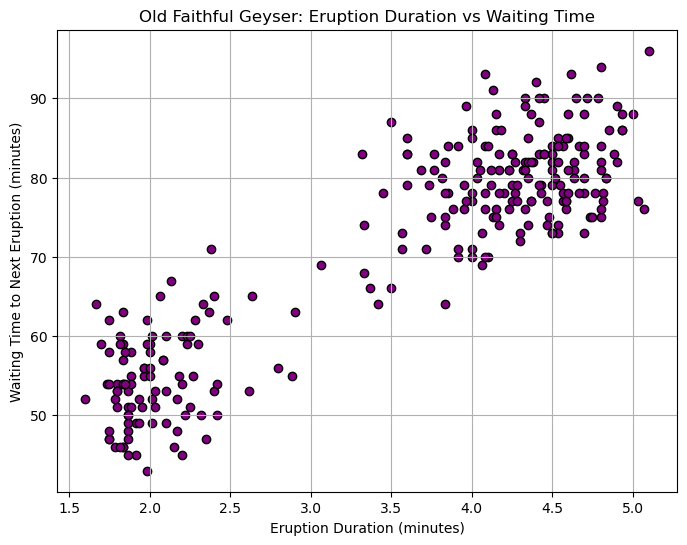


Problem 1b: Based on the scatter plot, I observe 2 clusters.

Problem 1c: Steps of Hierarchical Clustering Algorithm:
1. Start with each data point as its own cluster.
2. Compute pairwise distances between all clusters (e.g., using Euclidean distance).
3. Merge the two closest clusters into a single cluster.
4. Update the distance matrix to reflect the new cluster structure (e.g., using single, complete, or average linkage).
5. Repeat steps 2–4 until all points are in one cluster or a desired number of clusters is reached.
6. Use a dendrogram or stopping criterion to choose the final number of clusters.

Appropriateness: Hierarchical clustering could be appropriate for this dataset since the scatter plot shows two well-separated clusters. The method can capture the clear separation without requiring a predefined number of clusters. However, since the clusters are compact and spherical, K-Means is likely more efficient and equally effective.

Problem 2a: K-Means converged in 4 iteratio

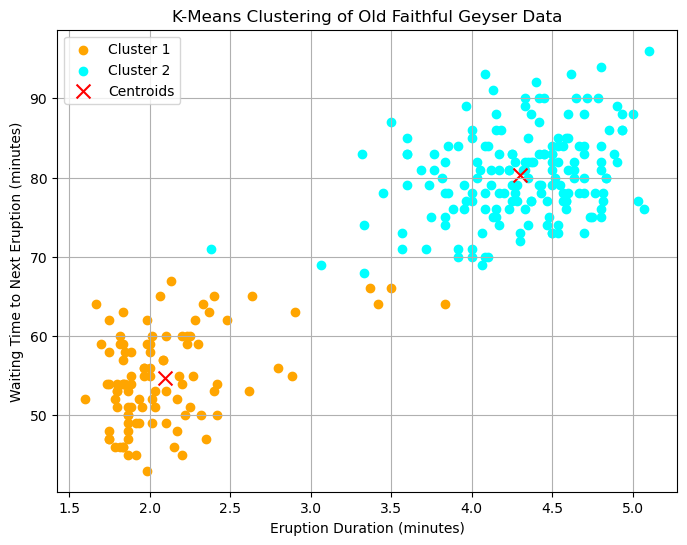


Problem 2c: K-Means converged in 4 iterations.
Final Objective Function Value: 8901.77


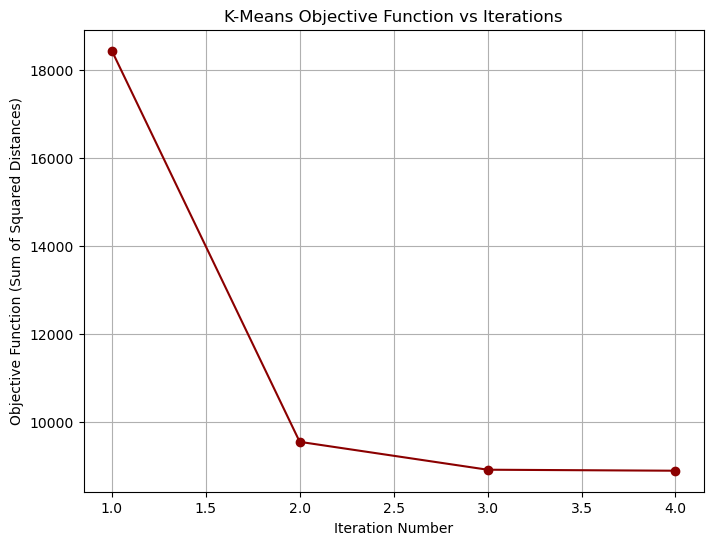


Problem 2d: The K-Means algorithm successfully identified the two clusters observed in Problem 1b. The scatter plot shows two distinct groups: one with shorter eruption and waiting times (Cluster 1) and one with longer times (Cluster 2). The random seed ensures consistent initialization, and the algorithm converged to the expected clusters without needing additional runs.


In [5]:
# Homework 3: Old Faithful Geyser Clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Old Faithful dataset from specified path
faithful_geyser = pd.read_csv(r'C:\Users\Lenovo\Downloads\faithful.csv')
print(faithful_geyser.head())

## Problem 1a) Scatter plot of eruption time vs waiting time
plt.figure(figsize=(8, 6))
plt.scatter(faithful_geyser['eruptions'], faithful_geyser['waiting'], c='purple', edgecolor='black')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time to Next Eruption (minutes)')
plt.title('Old Faithful Geyser: Eruption Duration vs Waiting Time')
plt.grid(True)
plt.show()

## Problem 1b) Number of clusters
# Based on the scatter plot, two distinct clusters are visible.
print("\nProblem 1b: Based on the scatter plot, I observe 2 clusters.")

## Problem 1c) Hierarchical clustering description and appropriateness
print("\nProblem 1c: Steps of Hierarchical Clustering Algorithm:")
print("1. Start with each data point as its own cluster.")
print("2. Compute pairwise distances between all clusters (e.g., using Euclidean distance).")
print("3. Merge the two closest clusters into a single cluster.")
print("4. Update the distance matrix to reflect the new cluster structure (e.g., using single, complete, or average linkage).")
print("5. Repeat steps 2–4 until all points are in one cluster or a desired number of clusters is reached.")
print("6. Use a dendrogram or stopping criterion to choose the final number of clusters.")
print("\nAppropriateness: Hierarchical clustering could be appropriate for this dataset since the scatter plot shows two well-separated clusters. The method can capture the clear separation without requiring a predefined number of clusters. However, since the clusters are compact and spherical, K-Means is likely more efficient and equally effective.")

## Problem 2a) Implement K-Means from scratch
data_points = faithful_geyser[['eruptions', 'waiting']].values

num_clusters = 2  # From Problem 1b
max_iterations = 100
convergence_tol = 1e-4

np.random.seed(42)
initial_centroids = data_points[np.random.choice(data_points.shape[0], num_clusters, replace=False)]
current_centroids = initial_centroids.copy()

for iter_num in range(max_iterations):
    distances = np.linalg.norm(data_points[:, np.newaxis] - current_centroids, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    new_centroids = np.array([data_points[cluster_labels == i].mean(axis=0) for i in range(num_clusters)])
    if np.all(np.linalg.norm(new_centroids - current_centroids, axis=1) < convergence_tol):
        break
    current_centroids = new_centroids

# Sort clusters by eruption duration for consistent labeling
centroid_info = [(i, current_centroids[i][0]) for i in range(num_clusters)]
centroid_info.sort(key=lambda x: x[1])

cluster_mapping = {centroid_info[0][0]: 1, centroid_info[1][0]: 2}
assigned_clusters = np.vectorize(cluster_mapping.get)(cluster_labels)

faithful_geyser['cluster_id'] = assigned_clusters

print(f"\nProblem 2a: K-Means converged in {iter_num + 1} iterations.\n")
print("Final Cluster Centroids:")
for orig_idx, cluster_num in cluster_mapping.items():
    centroid = current_centroids[orig_idx]
    print(f"Cluster {cluster_num}: Eruption = {centroid[0]:.2f} mins, Waiting = {centroid[1]:.2f} mins")
    if cluster_num == 2:
        print("Cluster 2: Longer Eruption and Waiting Times.\n")
    else:
        print("Cluster 1: Shorter Eruption and Waiting Times.\n")

unique_clusters, cluster_counts = np.unique(assigned_clusters, return_counts=True)
print("Points per Cluster:")
for cluster_num, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster_num}: {count} points")

total_inertia = sum(np.sum((data_points[cluster_labels == i] - current_centroids[i]) ** 2) for i in range(num_clusters))
print(f"\nFinal Inertia (Sum of Squared Distances): {total_inertia:.2f}")

print("\nSample points from each cluster:")
for cluster_num in [1, 2]:
    print(f"\nCluster {cluster_num} examples:")
    print(faithful_geyser[faithful_geyser['cluster_id'] == cluster_num][['eruptions', 'waiting']].head(5))

## Problem 2b) Scatter plot of final clusters
plt.figure(figsize=(8, 6))
cluster_colors = ['orange', 'cyan']
for cluster_idx in range(num_clusters):
    cluster_points = data_points[assigned_clusters == cluster_idx + 1]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=cluster_colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')
plt.scatter(current_centroids[:, 0], current_centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time to Next Eruption (minutes)')
plt.title('K-Means Clustering of Old Faithful Geyser Data')
plt.legend()
plt.grid(True)
plt.show()

## Problem 2c) Plot Objective Function vs Iterations
from sklearn.metrics import pairwise_distances_argmin

def k_means_custom(data, k, max_iters=100, seed=42):
    np.random.seed(seed)
    centroids = data[np.random.choice(len(data), k, replace=False)]
    objective_values = []

    for _ in range(max_iters):
        labels = pairwise_distances_argmin(data, centroids)
        new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)])
        distances = np.sum((data - centroids[labels])**2, axis=1)
        objective = np.sum(distances)
        objective_values.append(objective)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, labels, objective_values

data_points = faithful_geyser[['eruptions', 'waiting']].values
num_clusters = 2
final_centroids, final_labels, objective_values = k_means_custom(data_points, num_clusters)

print(f"\nProblem 2c: K-Means converged in {len(objective_values)} iterations.")
print(f"Final Objective Function Value: {objective_values[-1]:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, color='darkred', marker='o')
plt.xlabel('Iteration Number')
plt.ylabel('Objective Function (Sum of Squared Distances)')
plt.title('K-Means Objective Function vs Iterations')
plt.grid(True)
plt.savefig("K-Means_Objective_vs_Iterations.png", dpi=300)
plt.show()

## Problem 2d) Cluster identification
print("\nProblem 2d: The K-Means algorithm successfully identified the two clusters observed in Problem 1b. The scatter plot shows two distinct groups: one with shorter eruption and waiting times (Cluster 1) and one with longer times (Cluster 2). The random seed ensures consistent initialization, and the algorithm converged to the expected clusters without needing additional runs.")